### Importing the required files and data from google drive

In [ ]:
# TASK 1 : Importing the required Libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# TASK 2: Getting dataset from CSV File from Google Drive
from google.colab import files
uploaded = files.upload()

Saving news.csv to news.csv


### Determine shape, sample data, data types of dataset

In [ ]:
# TASK 3: Read the data and Store the data in a variable
df=pd.read_csv('news.csv')
# Get shape and head
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# TASK 4: Determine the Data types of Dataset
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [ ]:
# TASK 5: Visualize DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

#### Data cleaning on 'text' column like removing punctuations, stopwords removal

In [ ]:
# TASK 6: Importing the Files
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

In [ ]:
# TASK 7: Define the Punctuation cleaning function
clean_news=df.copy()
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# TASK 8: Call the review_cleaning function and save result in clean_news['text']
clean_news['text']=clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL


In [ ]:
# TASK 9: Download stopwords functionality
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# TASK 10: Removing stop words
stop = stopwords.words('english')
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november lesson tonig...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


In [ ]:
# TASK 11: Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()

,text
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,us secretary state john f kerry said monday st...
3,— kaydee king kaydeeking november lesson tonig...
4,primary day new york frontrunners hillary clin...


In [ ]:
# TASK 12 : Performing stemming on the review dataframe
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()
# Splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

### Data Visualization

In [ ]:
# TASK 13 : Displaying wordcloud for fake news and real news
#Install wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


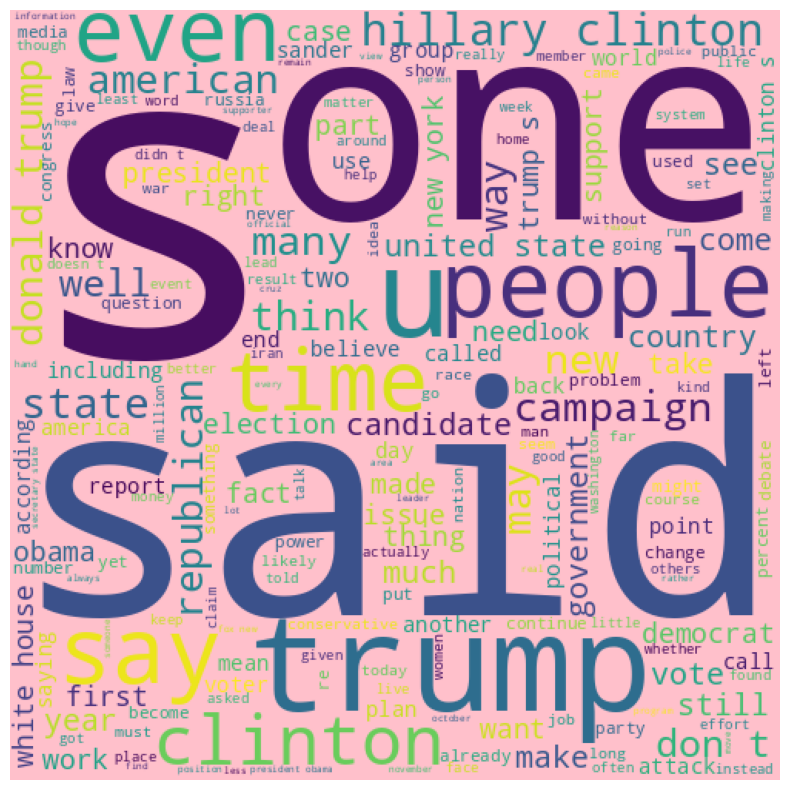

In [ ]:
# Display wordcloud of all news
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(news_features['text']))
plot_cloud(wordcloud)

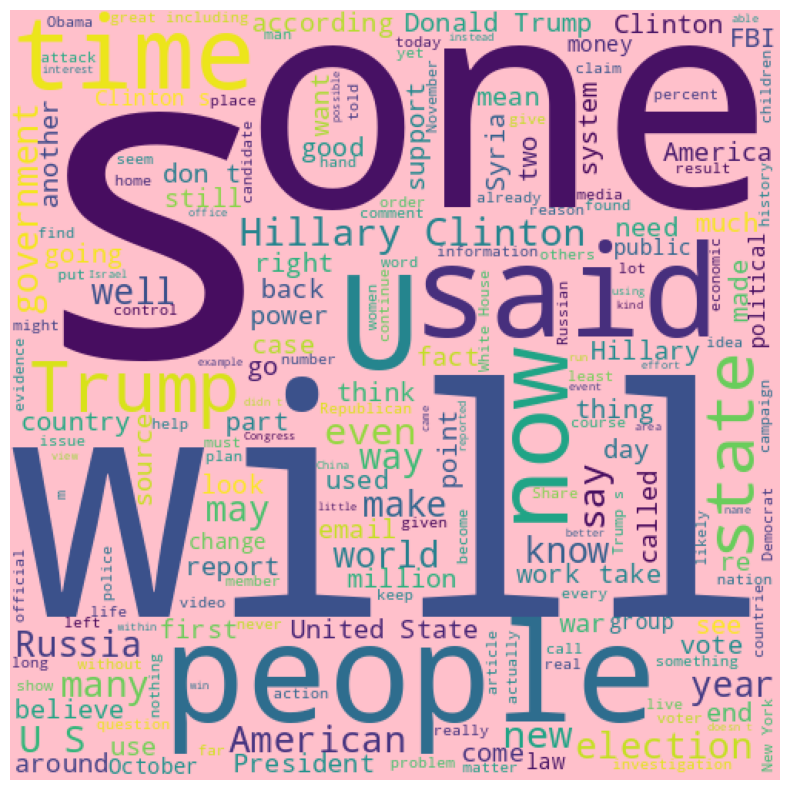

In [ ]:
# Word cloud for fake news
fake_news = df[df['label']=="FAKE"]
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(fake_news['text']))
plot_cloud(wordcloud)

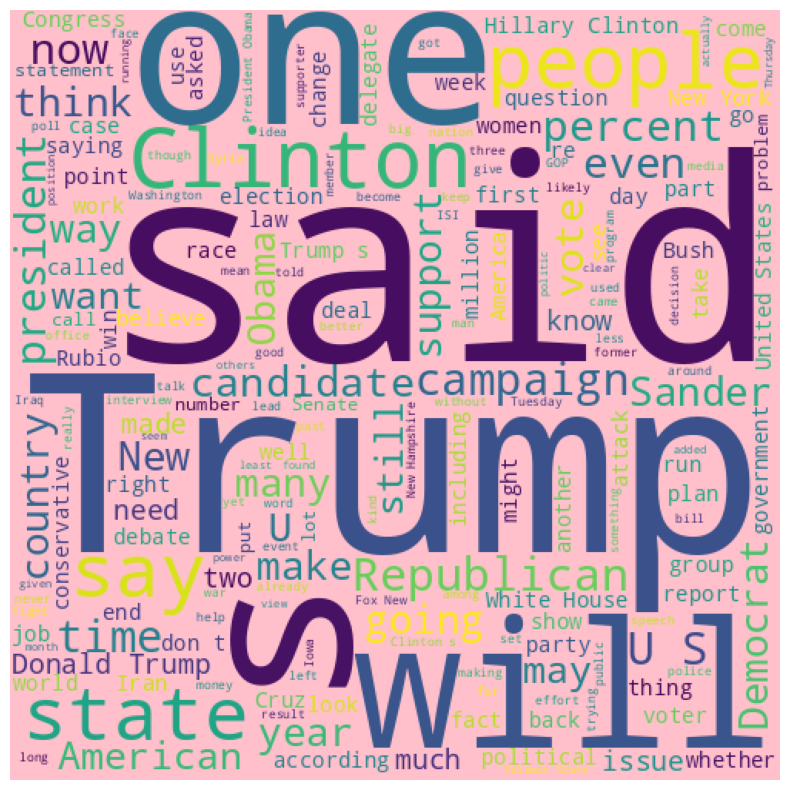

In [ ]:
# Word cloud for true news
fake_news = df[df['label']=="REAL"]
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(fake_news['text']))
plot_cloud(wordcloud)

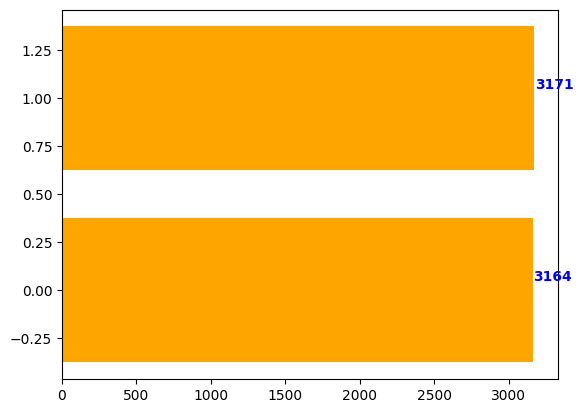

In [ ]:
# TASK 14: Plot a bar graph identifying Fake and Real News
import os
import matplotlib.pyplot as plt
x = ['FAKE','REAL']
y = [len(df[df['label'].str.contains("FAKE")]),len(df[df['label'].str.contains("REAL")])]
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))
  
ax.barh(ind, y, width,color = "orange")
  
for i, v in enumerate(y):
    ax.text(v + 2, i + .05, str(v), 
            color = 'blue', fontweight = 'bold')
plt.show()

<ipython-input-22-07e931729e1e>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
<ipython-input-22-07e931729e1e>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(news_features['polarity'])
<ipython-input-22-07e931729e1e>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

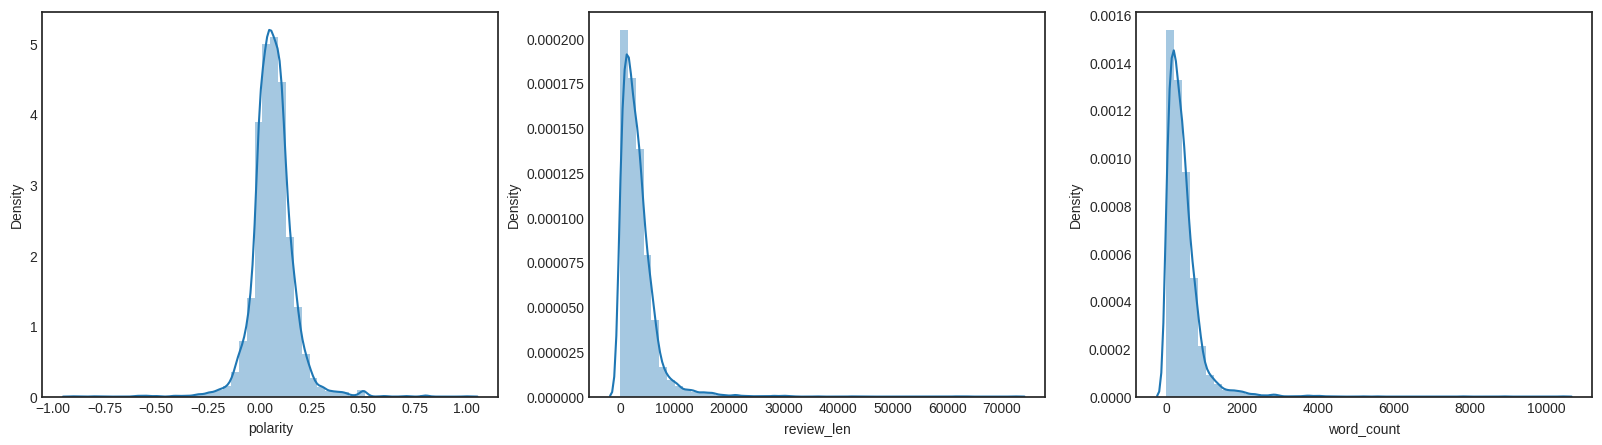

In [ ]:
# TASK 15: Plot distribution graphs for polarity, review length and word count
from textblob import TextBlob
import seaborn as sns
# Extracting the features from the text
news_features['polarity'] = news_features['text'].map(lambda text: TextBlob(text).sentiment.polarity)
news_features['review_len'] = news_features['text'].astype(str).apply(len)
news_features['word_count'] = news_features['text'].apply(lambda x: len(str(x).split()))

# Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(news_features['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(news_features['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(news_features['word_count'])
fig = plt.gcf()

### Perform Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# TASK 16 : Split the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(news_features['text'], labels, test_size=0.2, random_state=7)

In [ ]:
# TASK 17: Developed a TfidfVectorizer

# DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=5000,ngram_range=(2,2), max_df=0.7)

# DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


In [ ]:
# TASK 18: Determine Accuracy and Confusion Matrix using PassiveAggressiveClassifier

# DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.92%


In [ ]:
# DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[563,  75],
       [ 78, 551]])

In [ ]:
# TASK 19 : Determine Accuracy using MultinomialNB

from sklearn.naive_bayes import MultinomialNB
# DataFlair - Initialize a MultinomialNB
clf = MultinomialNB().fit(tfidf_train,y_train)
# DataFlair - Predict on the test set and calculate accuracy
y_pred1 = clf.predict(tfidf_test)
score=accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.82%


In [ ]:
# TASK 20: Install the dependancies requeried for LSTM Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# TASK 21: Perform one hot Encoding

# Setting up vocabulary size
voc_size=10000

# One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
# TASK 22: Perform Sentence Padding 

# Setting sentence length
sent_length=5000
# Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  937 8286 1114]
 [   0    0    0 ... 4381  576 5083]
 [   0    0    0 ... 9163 4521 4542]
 ...
 [   0    0    0 ... 7961 6944 1120]
 [   0    0    0 ... 8553  358 3978]
 [   0    0    0 ... 8244 3071 1012]]


In [ ]:
# View on embedded document
embedded_docs[1]

array([   0,    0,    0, ..., 4381,  576, 5083], dtype=int32)

## LSTM Model

In [ ]:
# TASK 23: Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 40)          400000    
                                                                 
 dropout (Dropout)           (None, 5000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# TASK 24: Rename the label column

# Label Real = 1 and Fake = 0
cleanup_nums = {"label":{"REAL": 1, "FAKE": 0}}

In [ ]:
# Display the dataframe df
df = df.replace(cleanup_nums)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
# TASK 25: Display Length of embedded document and shape of df['label'] column
len(embedded_docs),df['label'].shape

(6335, (6335,))

In [ ]:
# TASK 26: Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

# Check shape of X and y final
X_final.shape,y_final.shape

((6335, 5000), (6335,))

In [ ]:
# TASK 27: Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [ ]:
# TASK 28: Fitting with 5 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
67/67 [==============================] - 37s 431ms/step - loss: 0.6520 - accuracy: 0.6569 - val_loss: 0.4289 - val_accuracy: 0.8231
Epoch 2/5
67/67 [==============================] - 24s 361ms/step - loss: 0.3098 - accuracy: 0.8808 - val_loss: 0.2996 - val_accuracy: 0.8847
Epoch 3/5
67/67 [==============================] - 29s 424ms/step - loss: 0.2278 - accuracy: 0.9232 - val_loss: 0.3340 - val_accuracy: 0.8575
Epoch 4/5
67/67 [==============================] - 24s 358ms/step - loss: 0.1370 - accuracy: 0.9557 - val_loss: 0.3431 - val_accuracy: 0.8651
Epoch 5/5
67/67 [==============================] - 22s 337ms/step - loss: 0.0767 - accuracy: 0.9804 - val_loss: 0.3878 - val_accuracy: 0.8771


In [ ]:
# Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [ ]:
# TASK 29: Predicting from test data
y_pred = model.predict(X_test).round()
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

66/66 [==============================] - 4s 53ms/step
Confusion matrix:
[[964 107]
 [150 870]]


In [ ]:
# Accuracy of LSTM Model
accuracy_score(y_test,y_pred)

0.877092300334768

In [ ]:
# TASK 30: Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5000, 40)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# TASK 31: Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
67/67 [==============================] - 41s 544ms/step - loss: 0.6311 - accuracy: 0.6461 - val_loss: 0.4241 - val_accuracy: 0.8331
Epoch 2/5
67/67 [==============================] - 36s 533ms/step - loss: 0.3063 - accuracy: 0.8812 - val_loss: 0.4301 - val_accuracy: 0.7963
Epoch 3/5
67/67 [==============================] - 34s 516ms/step - loss: 0.1929 - accuracy: 0.9338 - val_loss: 0.3433 - val_accuracy: 0.8570
Epoch 4/5
67/67 [==============================] - 34s 510ms/step - loss: 0.0959 - accuracy: 0.9694 - val_loss: 0.3828 - val_accuracy: 0.8608
Epoch 5/5
67/67 [==============================] - 35s 529ms/step - loss: 0.0479 - accuracy: 0.9875 - val_loss: 0.4286 - val_accuracy: 0.8795


In [ ]:
# TASK 32: Predicting from test dataset
from sklearn.metrics import confusion_matrix
y_pred1 = model1.predict(X_test).round()
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred1)
print("Confusion matrix:")
print(cm)

66/66 [==============================] - 8s 107ms/step
Confusion matrix:
[[948 123]
 [129 891]]


In [ ]:
# Accuracy of bidirectional lstm model
accuracy_score(y_test,y_pred1)

0.8794835007173601

### BERT

In [ ]:
# TASK 33: Install all pytorch libraries
!pip install pytorch_pretrained_bert
!pip install pytorch-nlp
!pip install Keras-Preprocessing
import torch.nn as nn
from pytorch_pretrained_bert import BertTokenizer, BertModel
import torch
from torchnlp.datasets import imdb_dataset
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 105.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 KB 8.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.5 MB/s eta 0:00:00


In [ ]:
# TASK 34: Data Exploration
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
df = pd.read_csv("news.csv")
df = df[['text', 'label']]
# Limiting the dataset to 1000 rows only
df=df[0:1000]
print(df.head())

X = df['text'].values
y = df['label'].values
# Train test split of the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

                                                text label
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4  It's primary day in New York and front-runners...  REAL
Training set size: 600
Testing set size: 400


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

100%|██████████| 231508/231508 [00:00<00:00, 898855.69B/s]


In [ ]:
# TASK 34: Create tokens and token ids
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], X_train))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], X_test))
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))
train_tokens_ids = pad_sequences(train_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(test_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")

In [ ]:
# TASK 35: Generate a boolean array based on the value of ‘type’ for our testing and training sets
train_y = np.array(y_train) == 'FAKE'
test_y = np.array(y_test) == 'FAKE'

In [ ]:
print(train_y)
print(test_y)

[ True False  True  True False False False  True False  True  True False
  True  True  True  True  True  True  True  True False False False  True
 False  True  True False  True False  True  True  True  True False  True
 False  True  True  True False  True False False  True  True False False
  True  True False  True False  True  True  True False False False False
  True  True  True False  True False  True False False  True False  True
  True False False False  True False False  True  True False False False
 False  True  True False  True  True False  True  True False False False
  True  True  True False  True  True  True  True False False False  True
 False  True False False False False  True False False  True  True False
 False False  True  True False False  True  True  True False  True False
  True  True  True False  True False False False  True  True False False
  True False False False  True False False False  True False False False
  True  True False False  True  True False False  T

In [ ]:
# TASK 36: Model Building BertBinaryClassifier
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks,output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [ ]:
# TASK 37: Generate masks for training and testing 
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]
train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

In [ ]:
# TASK 38: For training and testing, create token tensors.
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()
test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

In [ ]:
# TASK 39: Prepare Data Loaders
train_dataset =  torch.utils.data.TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler =  torch.utils.data.RandomSampler(train_dataset)
train_dataloader =  torch.utils.data.DataLoader(train_dataset, sampler=train_sampler, batch_size=1)
test_dataset =  torch.utils.data.TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler =  torch.utils.data.SequentialSampler(test_dataset)
test_dataloader =  torch.utils.data.DataLoader(test_dataset, sampler=test_sampler, batch_size=1)

In [ ]:
# TASK 40: Fine Tuning BERT Model

# Adam optimizer is used to reduce the loss in binary cross entropy, and a batch size of one for one EPOCHS is used for training.
BATCH_SIZE = 1
EPOCHS = 1
bert_clf = BertBinaryClassifier()
optimizer = torch.optim.Adam(bert_clf.parameters(), lr=3e-6)
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t for t in batch_data)
        probas = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        batch_loss = loss_func(probas, labels)
        train_loss += batch_loss.item()
        bert_clf.zero_grad()
        batch_loss.backward()
        optimizer.step()
        print('Epoch:')
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(X_train) / BATCH_SIZE, train_loss / (step_num + 1)))


100%|██████████| 407873900/407873900 [00:13<00:00, 30742587.07B/s]


Epoch:
0/600.0 loss: 0.5145819783210754 
Epoch:
1/600.0 loss: 0.6884552836418152 
Epoch:
2/600.0 loss: 0.6800154050191244 
Epoch:
3/600.0 loss: 0.6905628591775894 
Epoch:
4/600.0 loss: 0.7093544602394104 
Epoch:
5/600.0 loss: 0.6939102013905843 
Epoch:
6/600.0 loss: 0.6892750518662589 
Epoch:
7/600.0 loss: 0.6872948855161667 
Epoch:
8/600.0 loss: 0.6954959299829271 
Epoch:
9/600.0 loss: 0.68819819688797 
Epoch:
10/600.0 loss: 0.6887474927035245 
Epoch:
11/600.0 loss: 0.6861059765021006 
Epoch:
12/600.0 loss: 0.6847802629837623 
Epoch:
13/600.0 loss: 0.6851190711770739 
Epoch:
14/600.0 loss: 0.6885716279347738 
Epoch:
15/600.0 loss: 0.6838818825781345 
Epoch:
16/600.0 loss: 0.6803741595324349 
Epoch:
17/600.0 loss: 0.6854208608468374 
Epoch:
18/600.0 loss: 0.6792930709688287 
Epoch:
19/600.0 loss: 0.6770758777856827 
Epoch:
20/600.0 loss: 0.6754655156816755 
Epoch:
21/600.0 loss: 0.6868053430860693 
Epoch:
22/600.0 loss: 0.6842105440471483 
Epoch:
23/600.0 loss: 0.680744377275308 
Epoch

In [ ]:
# TASK 41: Evaluate the model
bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):
        token_ids, masks, labels = tuple(t for t in batch_data)
        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])


In [ ]:
# TASK 42: Display Classification Report
print(classification_report(test_y, bert_predicted))

              precision    recall  f1-score   support

       False       0.91      0.92      0.91       209
        True       0.91      0.90      0.90       191

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

